<a href="https://colab.research.google.com/github/AnkitPatel745/OpenCV-Project-Pencil-Sketch-and-Cartoon-Paint-/blob/main/OpenCV_Starter_Project_(Pencil_Sketch_and_Cartoon_Paint)_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# # Finding the Path Of the File
# import os
# os.getcwd()

In [3]:
# Intalling the opencv library
!pip install opencv-python

In [49]:
# Importing the Library  
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as matim
import ipywidgets as widgets

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


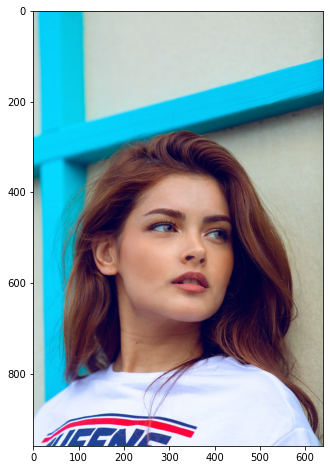

In [51]:
# Importing the image from directory
img = matim.imread('/content/drive/MyDrive/Data Science Project(Self)/OpenCV/OpenCV Project/images/g2.jpg')
plt.figure(figsize=(15,8))
plt.imshow(img)

plt.show()

### Preserving Filters

In [52]:
# creating the image of orignal and the filter image 
@widgets.interact_manual(s=(0,200,1),r=(0,1,0.1))
def edgePreserve(s=50,r=0.5):
    edgeImg = cv2.edgePreservingFilter(img, sigma_s=s, sigma_r=r)
    plt.figure(figsize=(18,8))
    plt.subplot(1,2,1)
    plt.title('Original Img')
    plt.imshow(img)
    plt.subplot(1,2,2)
    plt.title('Blor Filtered Img')
    plt.imshow(edgeImg)
    plt.show()

interactive(children=(IntSlider(value=50, description='s', max=200), FloatSlider(value=0.5, description='r', m…

In [53]:
@widgets.interact_manual(s=(1,200,1),r=(0,1,0.1))
def detail(s=20,r=0.2):
    detailImg = cv2.detailEnhance(img, sigma_s=s, sigma_r=r)
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    plt.title("Original Image")
    plt.imshow(img)
    plt.subplot(1,2,2)
    plt.title("Filtered Image")
    plt.imshow(detailImg)
    plt.show()

interactive(children=(IntSlider(value=20, description='s', max=200, min=1), FloatSlider(value=0.2, description…

### Creating the Look UP table

In [54]:
def adjust_gamma(image,gamma=1):
    invGamma = 1.0/gamma
    table = np.array([(i/255)**invGamma*255 for i in np.arange(0,256)])
    lut_img = cv2.LUT(image.astype(np.uint8),table.astype(np.uint8))
    return lut_img

## Image to Pencil Sketch

In [55]:
ksize = 21
sigmaX= 9
gamma = 0.1
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray,(ksize,ksize),sigmaX)
gray_blur_divide = cv2.divide(gray,gray_blur,scale=255)
pencil_sketch =adjust_gamma(gray_blur_divide,gamma=gamma)

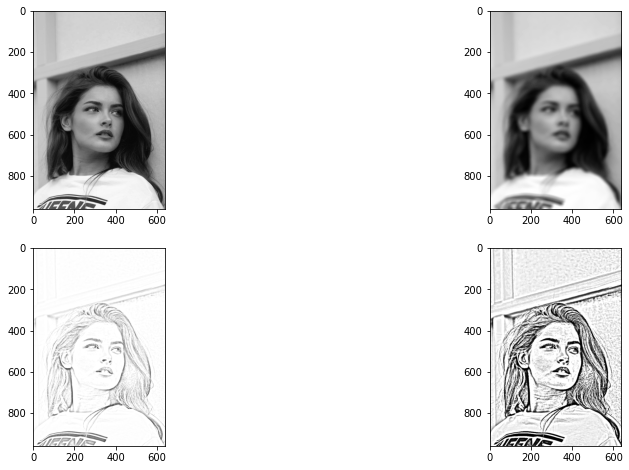

In [56]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.imshow(gray, cmap = 'gray')
plt.subplot(2,2,2)
plt.imshow(gray_blur, cmap = 'gray')
plt.subplot(2,2,3)
plt.imshow(gray_blur_divide, cmap = 'gray')
plt.subplot(2,2,4)
plt.imshow(pencil_sketch, cmap = 'gray')
plt.show()

### Converting the Image to Pencil Sketch.

In [57]:
@widgets.interact_manual(ksize=(3,25,2),sigmaX=(1,15,2),gamma=(0,1,0.01))
def pencil_art_img(ksize=21,sigmaX=9,gamma=0.01):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray_blur = cv2.GaussianBlur(gray,(ksize,ksize),sigmaX)
    gray_blur_divide = cv2.divide(gray,gray_blur,scale=255)
    pencil_sketch =adjust_gamma(gray_blur_divide,gamma=gamma)
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    plt.title('Original Img')
    plt.imshow(img,cmap = 'gray')
    plt.subplot(1,2,2)
    plt.title('Pencil Sketch')
    plt.imshow(pencil_sketch,cmap = 'gray')
    plt.show()

interactive(children=(IntSlider(value=21, description='ksize', max=25, min=3, step=2), IntSlider(value=9, desc…

## Image To Cartoon Paint

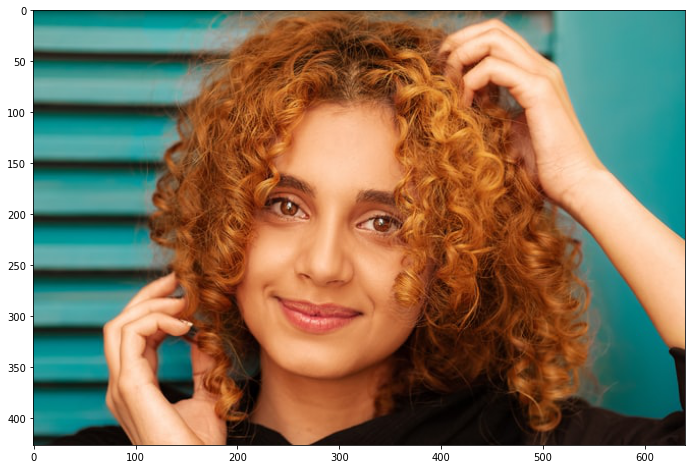

In [58]:
# Importing the image from directory
img = matim.imread('/content/drive/MyDrive/Data Science Project(Self)/OpenCV/OpenCV Project/images/g1.jpg')
plt.figure(figsize=(15,8))
plt.imshow(img)

plt.show()

In [59]:
# Edge Mask
def edge_mask(img,ksize,block_size):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray_median = cv2.medianBlur(gray,ksize)
    edges = cv2.adaptiveThreshold(gray_median,255,cv2.ADAPTIVE_THRESH_MEAN_C,
                                  cv2.THRESH_BINARY,block_size,ksize)
    return edges

In [60]:
edge_img = edge_mask(img,5,9)

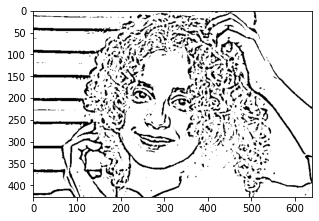

In [61]:
plt.figure(figsize=(5,5))
plt.imshow(edge_img,cmap='gray')
plt.show()

## K-Means Clustering Filter


In [62]:
def kmean_cluster(img,K):
    # transform data
    data = np.float32(img).reshape((-1,3))

    creteria =(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,20,0.001)
    # k-means
    ret, label, center = cv2.kmeans(data,K,None,creteria,5,cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    return result

In [63]:
cluster_img = kmean_cluster(img,15)

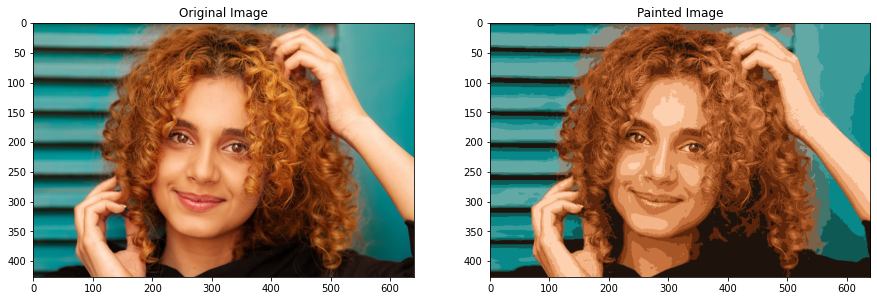

In [65]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img)
plt.subplot(1,2,2)
plt.title("Painted Image")
plt.imshow(cluster_img)
plt.show()

In [66]:
# applying bilateral filter
d=7
sigmaColor = 200 # greater than 100
sigmaSpace = 200 # greater than 200
bilateral = cv2.bilateralFilter(cluster_img,d=d,sigmaColor=sigmaColor,
                               sigmaSpace=sigmaSpace)
cartoon = cv2.bitwise_and(bilateral,bilateral,mask=edge_img)

In [67]:
@widgets.interact_manual(d=(1,20,1),sigmaColor=(100,500,10),sigmaSpace=(200,600,10))
def bilateral_img(d=7,sigmaColor=200,sigmaSpace=200):
    bilateral = cv2.bilateralFilter(cluster_img,d=d,sigmaColor=sigmaColor,
                               sigmaSpace=sigmaSpace)
    cartoon = cv2.bitwise_and(bilateral,bilateral,mask=edge_img)
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    plt.title("Original Image")
    plt.imshow(img)
    plt.subplot(1,2,2)
    plt.title("Cartoon Image")
    plt.imshow(cartoon)
    plt.show()

interactive(children=(IntSlider(value=7, description='d', max=20, min=1), IntSlider(value=200, description='si…